In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
from brian2.units import *
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
files = !cd provenance & ls *.txt
print files

['1_0_10.txt', '1_0_11.txt', '1_0_12.txt', '1_0_13.txt', '1_0_14.txt', '1_0_15.txt', '1_0_2.txt', '1_0_3.txt', '1_0_4.txt', '1_0_5.txt', '1_0_6.txt', '1_0_7.txt', '1_0_8.txt', '1_0_9.txt']


In [3]:
open_files = []
eof = []
for f in files:
    open_files.append(open(f, "r"))  
    eof.append(False)
print len(open_files), "files"

14 files


In [4]:
post_ids = []
pre_app_pops = []
pre_subpops = []
pre_ids = []

global_pre_id = []
global_post_id = []
distance_sq = []

elim_prob = []
removals = []
form_prob = []
formations = []

rem_fails = []
form_fails = []

files_based_removals = {}
files_based_formations = {}

sr_attempts = []
oob= []

In [5]:
for i in range(len(open_files)):
    files_based_removals[i] = []
    files_based_formations[i] = []
    for line in open_files[i]:
        if not line:
            eof[i] = True
        spleet = str.split(line)
        if "presynaptic subpopulation" in line:
            post_ids.append(int(spleet[4]))
            pre_app_pops.append(int(spleet[6]))
            pre_subpops.append(int(spleet[9]))
            pre_ids.append(int(spleet[-1]))
        elif "g_distance_sq" in line:
            global_pre_id.append(int(spleet[4]))
            global_post_id.append(int(spleet[6]))
            distance_sq.append(int(spleet[-1]))
        elif "elim_prob" in line:
            elim_prob.append(int(spleet[5]))
        elif "form_prob" in line:
            form_prob.append([int(spleet[4]), int(spleet[7]), int(spleet[9])])
        elif "| RM pre" in line:
            removals.append([int(spleet[6]), int(spleet[8]), int(spleet[13]), int(spleet[-1])])
        elif "| FORM pre" in line:
            formations.append([int(spleet[6]), int(spleet[8]), int(spleet[15]), int(spleet[-1])])
        elif "| FAIL POT" in line or "| FAIL DEP" in line: 
            rem_fails.append(int(spleet[-1]))
            files_based_removals[i].append(int(spleet[-1]))
        elif "| NO FORM" in line:
            form_fails.append(int(spleet[-1]))
            files_based_formations[i].append(int(spleet[-1]))
        elif "sr_attempt" in line:
            sr_attempts.append(int(spleet[-1]))   
        
        if "| OOB" in line:
            oob.append([int(spleet[5]), int(spleet[6]), int(spleet[7])])
            form_fails.append(int(spleet[6]))

In [6]:
for f in open_files:
    f.close()

In [7]:
post_ids = np.asarray(post_ids)
pre_app_pops = np.asarray(pre_app_pops)
pre_subpops = np.asarray(pre_subpops)
pre_ids = np.asarray(pre_ids)

global_pre_id = np.asarray(global_pre_id)
global_post_id = np.asarray(global_post_id)
distance_sq = np.asarray(distance_sq)

rem_fails = np.asarray(rem_fails)
form_fails = np.asarray(form_fails)
sr_attempts = np.asarray(sr_attempts)

oob=np.asarray(oob)

(array([ 5434.,  5613.,  5324.,  5467.,  5411.,  5481.,  5442.,  5517.,
         5465.,  5046.,  5070.,  5098.,  4985.,  5142.,  5075.,  5144.,
         5162.,  5042.,  5082.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 19 Patch objects>)

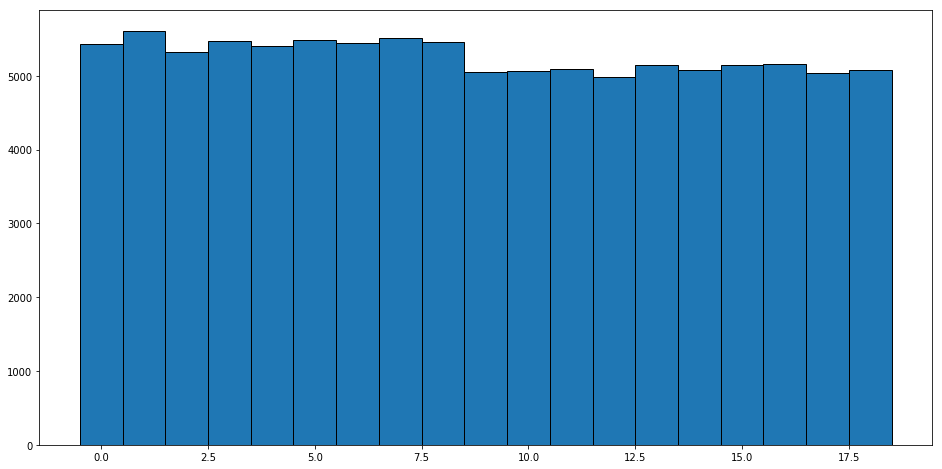

In [8]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(post_ids)
ax1.hist(post_ids, bins=np.arange(np.max(d)+2)-.5, edgecolor='black')

(array([ 5916.,  5411.,  5509.,  5707.,  5687.,  5659.,  5725.,  5622.,
         5742.,  5436.,  5619.,  5450.,  5201.,  5617.,  5355.,  5371.,
         5610.,  2611.,  2752.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 19 Patch objects>)

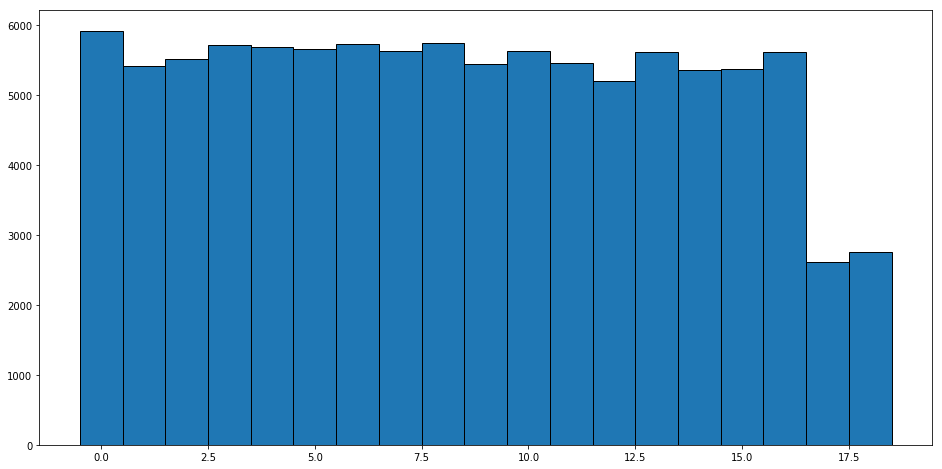

In [9]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(pre_ids)
ax1.hist(pre_ids, bins=np.arange(np.max(d)+2)-.5, edgecolor='black')

(array([ 0.49815,  0.     ,  0.50185]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

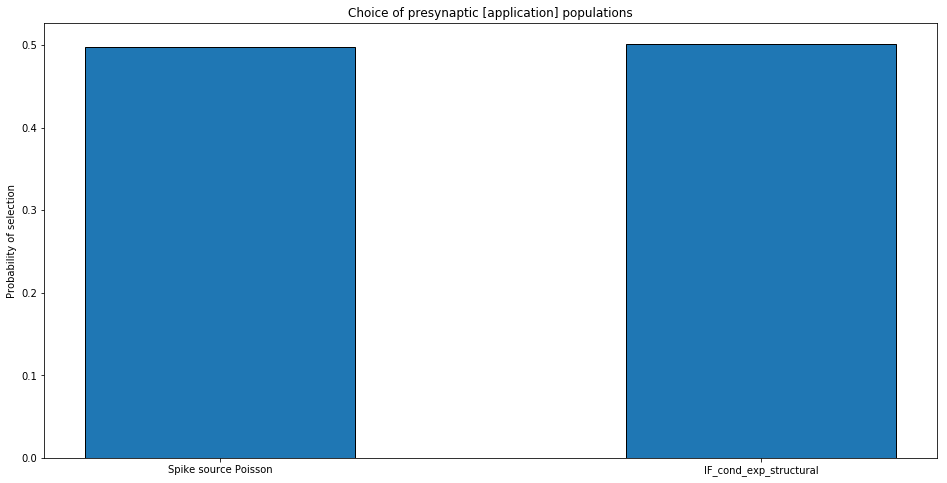

In [10]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Choice of presynaptic [application] populations")
plt.xticks([0, 2], ["Spike source Poisson", "IF_cond_exp_structural"])
ax1.set_ylabel("Probability of selection")
d = np.unique(pre_app_pops*2)
ax1.hist(pre_app_pops*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

([<matplotlib.axis.XTick at 0xe5256a0>,
 <a list of 29 Text xticklabel objects>)

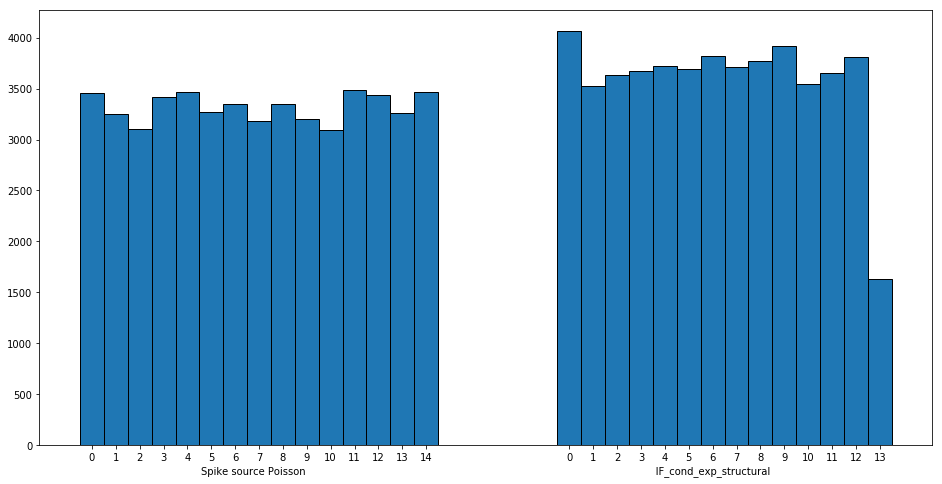

In [11]:
# combine presynaptic app with subpop
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
combo = pre_app_pops * 20 + pre_subpops

d = np.unique(combo)
ax1.hist(combo, bins=np.arange(np.max(combo)+2)-.5, edgecolor='black')
ax1.set_xlabel("Spike source Poisson {:110s} IF_cond_exp_structural".format(' '))
plt.xticks(np.concatenate((np.unique(combo[combo < np.mean(combo)]), np.unique(combo[combo > np.mean(combo)]))), np.concatenate((np.unique(combo[combo < np.mean(combo)]), np.unique(combo[combo > np.mean(combo)])-np.min(combo[combo > np.mean(combo)]))))

(array([ 7529.,  6784.,  6739.,  7094.,  7194.,  6971.,  7170.,  6896.,
         7122.,  7127.,  6643.,  7138.,  7244.,  4886.,  3463.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5]),
 <a list of 15 Patch objects>)

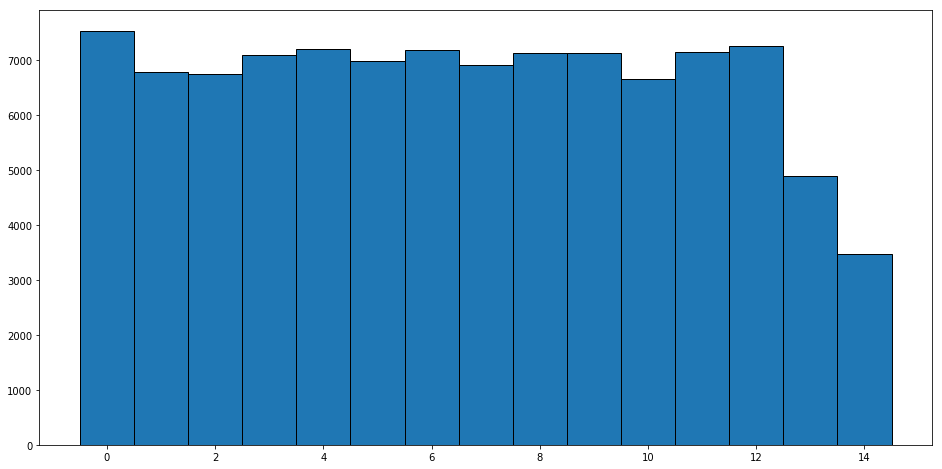

In [12]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(pre_subpops)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(pre_subpops, bins=np.arange(np.max(d)+2)-.5, edgecolor='black')

In [13]:
data = np.asarray(pre_subpops)

In [14]:
data[data==0].size

7529

In [15]:
data[data==1].size

6784

(array([ 410.,  327.,  366.,  378.,  351.,  454.,  459.,  383.,  468.,
         439.,  458.,  467.,  425.,  454.,  346.,  459.,  454.,  317.,
         502.,  318.,  399.,  379.,  380.,  363.,  300.,  369.,  379.,
         440.,  328.,  384.,  416.,  378.,  357.,  450.,  324.,  308.,
         395.,  376.,  517.,  412.,  404.,  436.,  333.,  351.,  456.,
         341.,  345.,  330.,  411.,  362.,  336.,  374.,  338.,  298.,
         392.,  379.,  365.,  405.,  414.,  443.,  484.,  341.,  437.,
         359.,  424.,  374.,  365.,  458.,  378.,  388.,  376.,  380.,
         441.,  362.,  375.,  450.,  441.,  379.,  392.,  336.,  390.,
         398.,  423.,  430.,  449.,  381.,  366.,  379.,  363.,  488.,
         466.,  345.,  343.,  380.,  362.,  309.,  440.,  363.,  443.,
         425.,  387.,  416.,  379.,  424.,  357.,  342.,  394.,  441.,
         406.,  315.,  415.,  390.,  396.,  389.,  403.,  428.,  373.,
         412.,  346.,  422.,  359.,  442.,  433.,  357.,  386.,  378.,
      

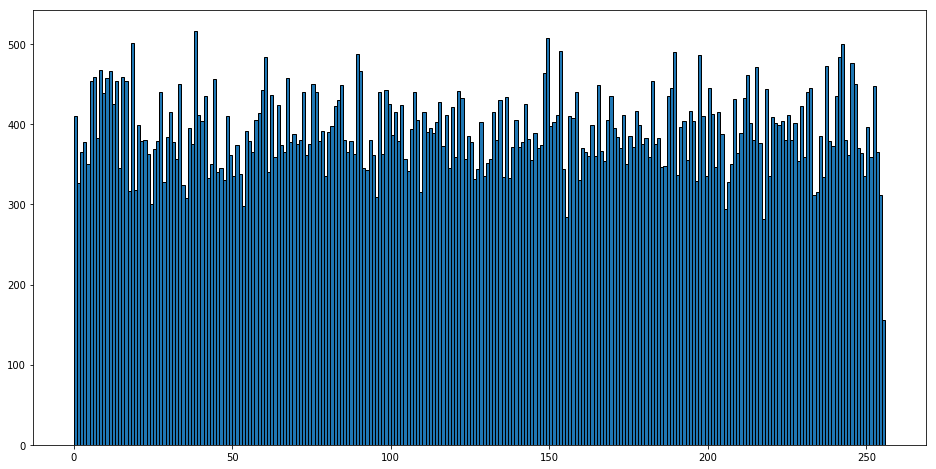

In [16]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_pre_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(global_pre_id, bins=np.arange(np.max(d)+2), edgecolor='black')

(array([ 402.,  415.,  433.,  416.,  410.,  392.,  373.,  441.,  405.,
         353.,  395.,  398.,  395.,  356.,  385.,  402.,  432.,  403.,
         387.,  382.,  376.,  380.,  408.,  368.,  342.,  383.,  395.,
         382.,  381.,  405.,  359.,  386.,  392.,  417.,  405.,  413.,
         417.,  396.,  405.,  404.,  392.,  393.,  403.,  420.,  406.,
         376.,  377.,  390.,  368.,  368.,  381.,  425.,  403.,  367.,
         391.,  374.,  380.,  406.,  390.,  362.,  395.,  380.,  417.,
         399.,  414.,  409.,  395.,  380.,  378.,  381.,  373.,  360.,
         404.,  373.,  380.,  399.,  391.,  412.,  372.,  403.,  375.,
         382.,  403.,  408.,  357.,  391.,  362.,  421.,  417.,  410.,
         390.,  384.,  378.,  410.,  414.,  373.,  393.,  384.,  360.,
         368.,  348.,  377.,  389.,  378.,  401.,  406.,  401.,  368.,
         401.,  408.,  402.,  387.,  364.,  371.,  353.,  407.,  372.,
         388.,  401.,  424.,  395.,  390.,  409.,  387.,  398.,  372.,
      

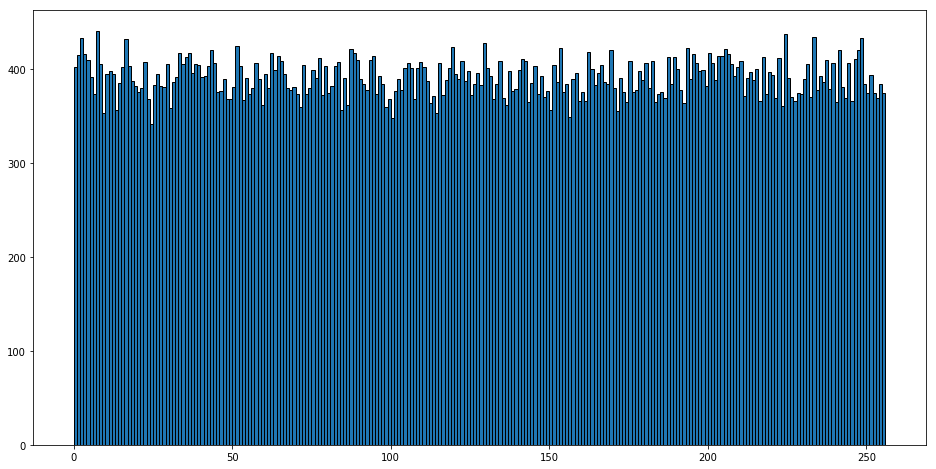

In [17]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(global_post_id)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(global_post_id, bins=np.arange(np.max(d)+2), edgecolor='black')

(array([  381.,  1563.,  1597.,     0.,  1619.,  3062.,     0.,     0.,
         1541.,  1609.,  3160.,     0.,     0.,  3186.,     0.,     0.,
         1509.,  3192.,  1558.,     0.,  3107.,     0.,     0.,     0.,
            0.,  4663.,  3130.,     0.,     0.,  3102.,     0.,     0.,
         1550.,     0.,  3173.,     0.,  1545.,  3073.,     0.,     0.,
         3050.,  3125.,     0.,     0.,     0.,  3235.,     0.,     0.,
            0.,  1532.,  4723.,     0.,  3128.,  3089.,     0.,     0.,
            0.,     0.,  3130.,     0.,     0.,  3156.,     0.,     0.,
          765.,  4681.,     0.,     0.,  1473.,     0.,     0.,     0.,
         1639.,  1566.,  3130.,     0.,     0.,     0.,     0.,     0.,
         1577.,     0.,     0.,     0.,     0.,  3089.,     0.,     0.,
            0.,  1540.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,  1602.,     0.,  1576.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 

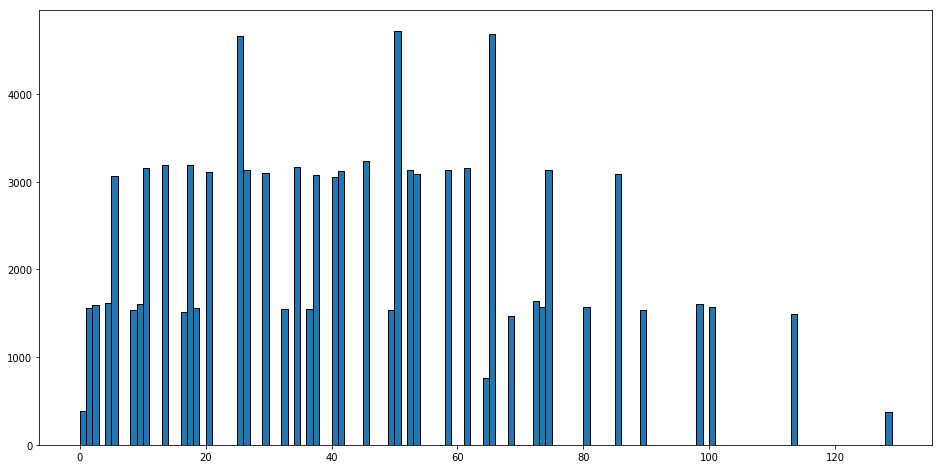

In [18]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(distance_sq)
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))
ax1.hist(distance_sq, bins=np.arange(np.max(d)+2),edgecolor='black')

In [19]:
dist = np.sqrt(distance_sq)
m = np.mean(dist)
std = np.std(dist)

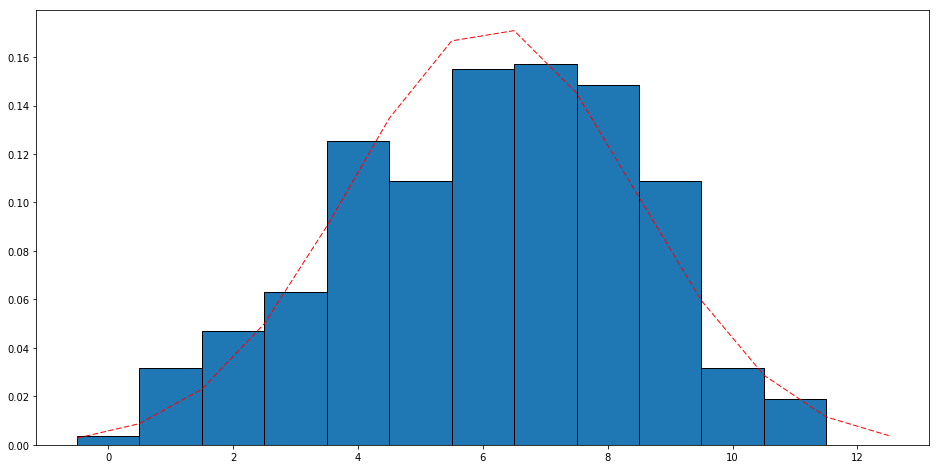

In [20]:
import matplotlib.mlab as mlab
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
d = np.unique(np.sqrt(distance_sq))
# data = np.asarray(pre_subpops)
# left_of_first_bin = data.min() - float(d)/2
# right_of_last_bin = data.max() + float(d)/2
# plt.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d))

n, bins, patches = ax1.hist(np.sqrt(distance_sq), bins=np.arange(np.max(d)+2)-.5,normed=1, edgecolor='black')
y = mlab.normpdf( bins, m, std)
l = ax1.plot(bins, y, 'r--', linewidth=1)

In [21]:
def distance(x0, x1, grid=np.asarray([16, 16]), type='euclidian'):
    x0 = np.asarray(x0)
    x1 = np.asarray(x1)
    delta = np.abs(x0 - x1)
    delta = np.where(delta > grid * .5, delta - grid, delta)

    if type == 'manhattan':
        return np.abs(delta).sum(axis=-1)
    return np.sqrt((delta ** 2).sum(axis=-1))
def index_to_dist(i1, i2, grid):
    return distance((i1//grid[0], i1%grid[1]),(i2//grid[0], i2%grid[1]), grid=grid, type='euclidian')

In [22]:
layer_size = 256
grid_layout = np.asarray((16, 16))

In [23]:
for i in np.arange(global_post_id.size):
    assert np.round(index_to_dist(global_pre_id[i], global_post_id[i], grid_layout)**2) == distance_sq[i]

In [24]:
counts = np.ones((layer_size, layer_size)) * np.nan

In [25]:
for i in np.arange(global_post_id.size):
    if np.isnan(counts[global_pre_id[i], global_post_id[i]]):
        counts[global_pre_id[i], global_post_id[i]] = 1
    else:
        counts[global_pre_id[i], global_post_id[i]] += 1

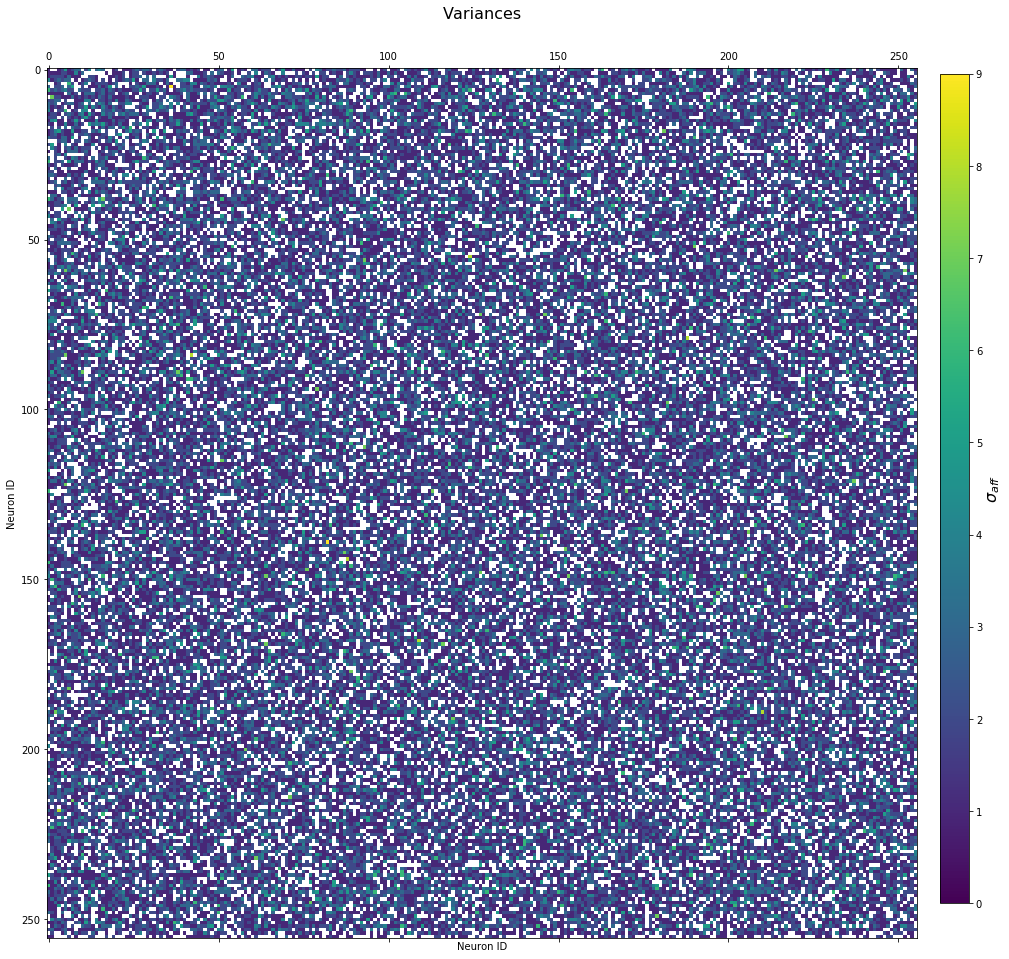

In [26]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Variances", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("$\sigma_{aff}$", fontsize=16)

In [27]:
print "total rewire attempts", np.nansum(counts)

total rewire attempts 100000.0


In [28]:
print "hit locations", np.count_nonzero(np.isfinite(counts))

hit locations 51353


In [29]:
print "surface coverage", np.count_nonzero(np.isfinite(counts)) * 100. / counts.size 

surface coverage 78.3584594727


In [30]:
elim_prob = np.asarray(elim_prob)
removals= np.asarray(removals)
form_prob= np.asarray(form_prob)
formations = np.asarray(formations)

In [31]:
formation_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(formations.shape[0]):
    if np.isnan(formation_counts[formations[i, 0], formations[i, 1]]):
        formation_counts[formations[i, 0], formations[i, 1]] = 1
    else:
        formation_counts[formations[i, 0], formations[i, 1]] += 1

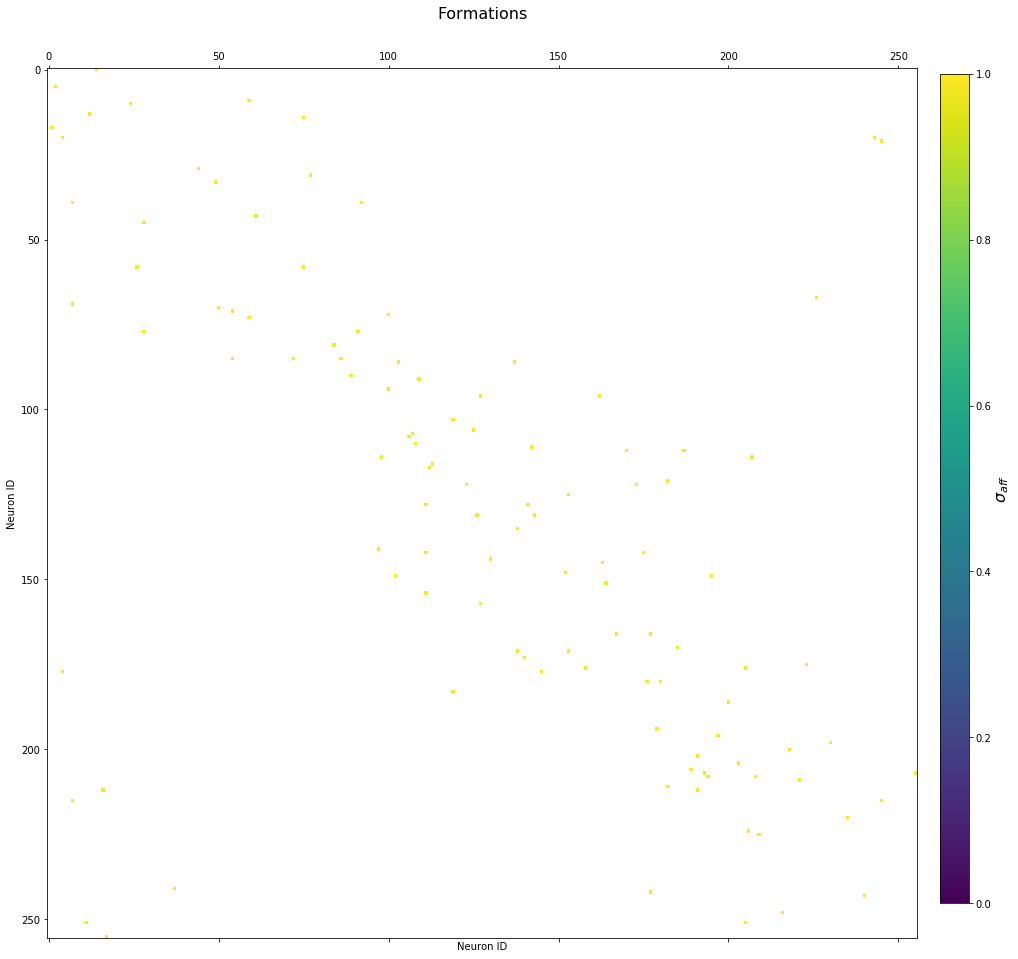

In [32]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(formation_counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Formations", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("$\sigma_{aff}$", fontsize=16)

In [33]:
print "hit locations", np.count_nonzero(np.isfinite(formation_counts))

hit locations 112


In [34]:
deletion_counts = np.ones((layer_size, layer_size)) * np.nan
for i in np.arange(removals.shape[0]):
    if np.isnan(deletion_counts[removals[i, 0], removals[i, 1]]):
        deletion_counts[removals[i, 0], removals[i, 1]] = 1
    else:
        deletion_counts[removals[i, 0], removals[i, 1]] += 1

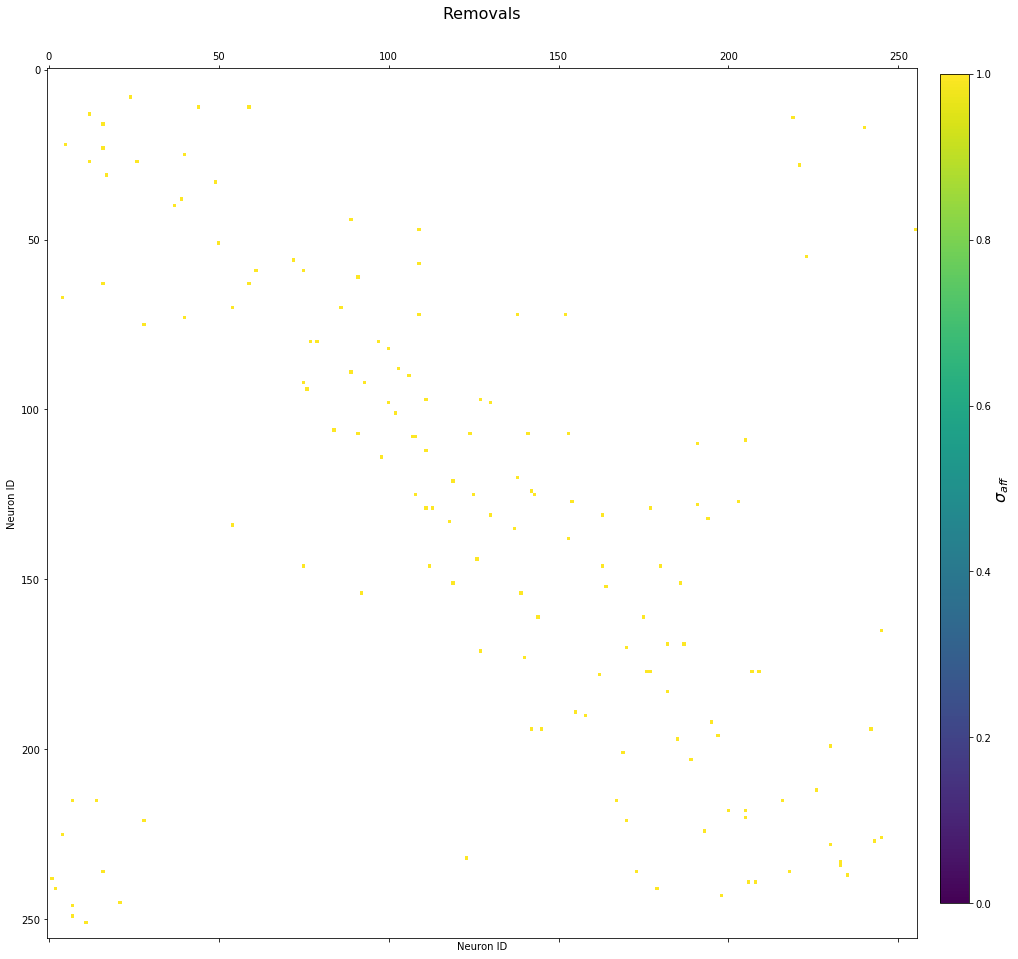

In [35]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16,16))
i = ax1.matshow(deletion_counts, vmin=0)
ax1.grid(visible=False)
ax1.set_title("Removals", fontsize=16)
ax1.set_xlabel("Neuron ID")
ax1.set_ylabel("Neuron ID")
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
# ax1.set_ylim([20, 0])
# ax1.set_xlim([0, 20])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("$\sigma_{aff}$", fontsize=16)

In [36]:
print "hit locations", np.count_nonzero(np.isfinite(deletion_counts))

hit locations 149


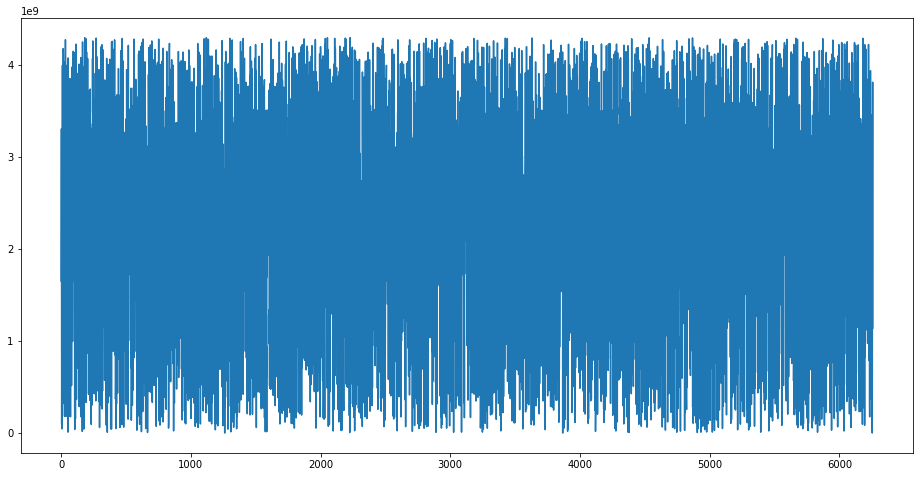

In [37]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(elim_prob)


In [38]:
np.max(elim_prob)

4294917531

In [39]:
np.min(elim_prob)

424791

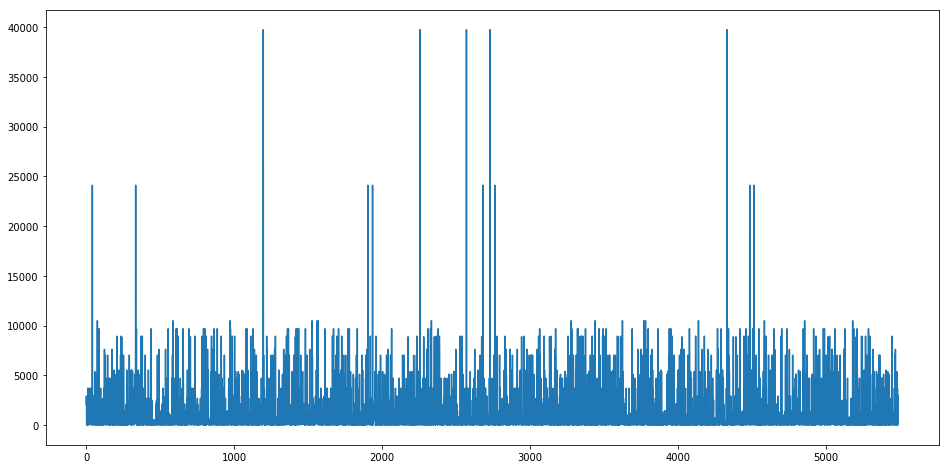

In [40]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(form_prob[:, 0])

In [41]:
# Formation control
formation_prob_controls = form_prob[:, -1]
print formation_prob_controls.shape

(5490L,)


(array([ 0.82276867,  0.17723133]),
 array([-0.5,  0.5,  1.5]),
 <a list of 2 Patch objects>)

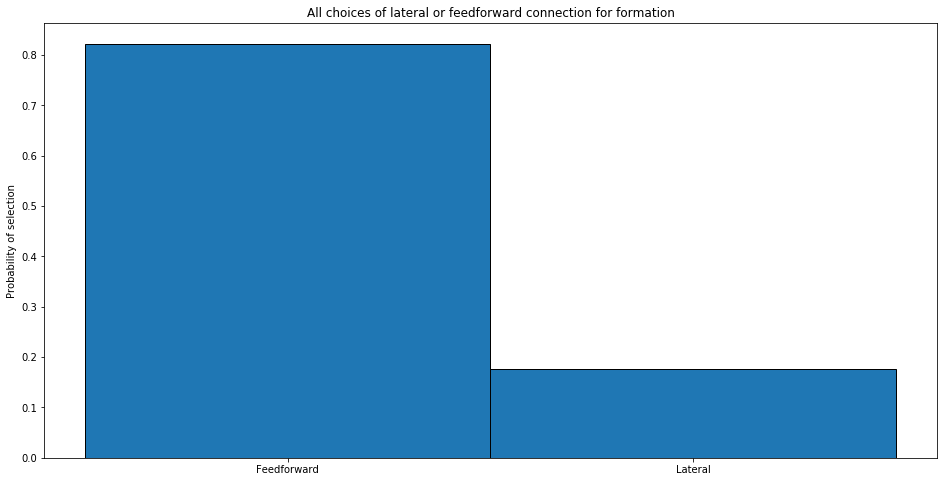

In [42]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("All choices of lateral or feedforward connection for formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(formation_prob_controls)
ax1.hist(formation_prob_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [43]:
actual_formation_controls = formations[:, 2]
print actual_formation_controls.shape

(112L,)


(array([ 0.78571429,  0.21428571]),
 array([-0.5,  0.5,  1.5]),
 <a list of 2 Patch objects>)

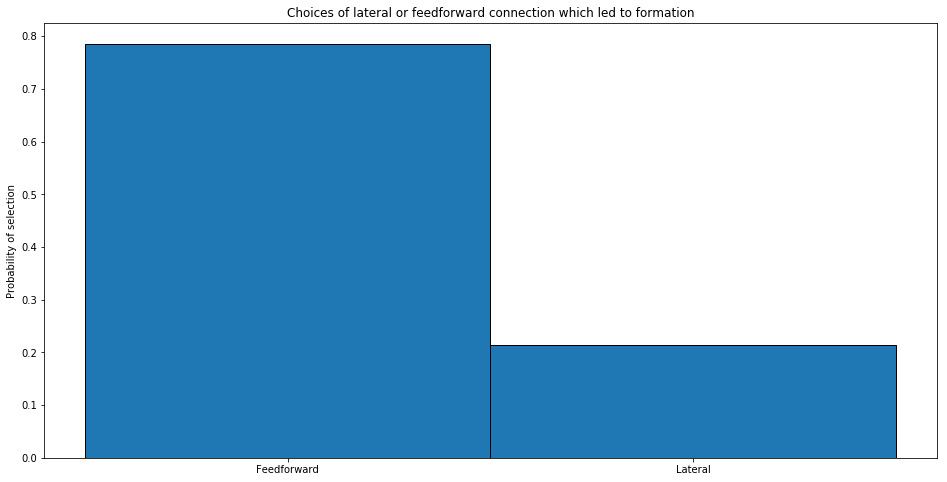

In [44]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Choices of lateral or feedforward connection which led to formation")
plt.xticks([0, 1], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(actual_formation_controls)
ax1.hist(actual_formation_controls, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [45]:
# sanity checks -- the times in rem_fails and form_fails do not repeat and monotonically increase

In [46]:
sorted_rem_fails = np.sort(rem_fails)
assert all(np.diff(sorted_rem_fails) > 0)

In [47]:
sorted_form_fails = np.sort(form_fails)
assert all(np.diff(sorted_form_fails) > 0)

In [48]:
sorted_form_fails[1]

458

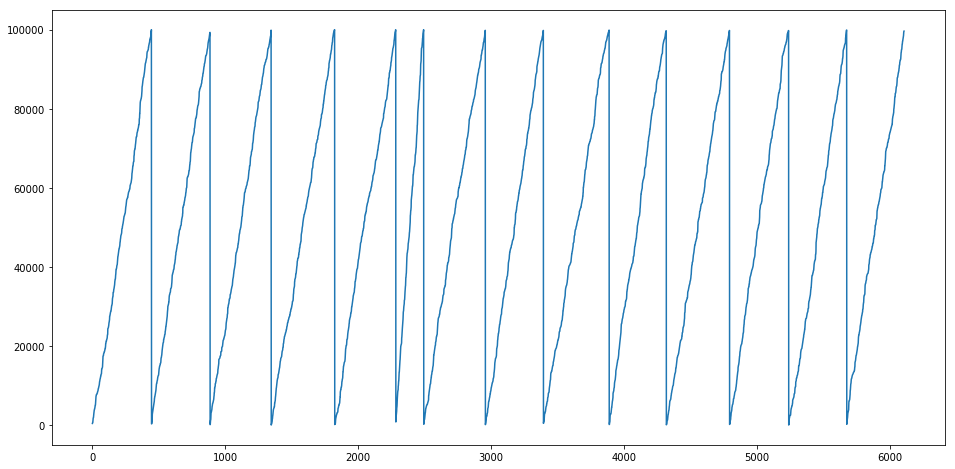

In [49]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(rem_fails)

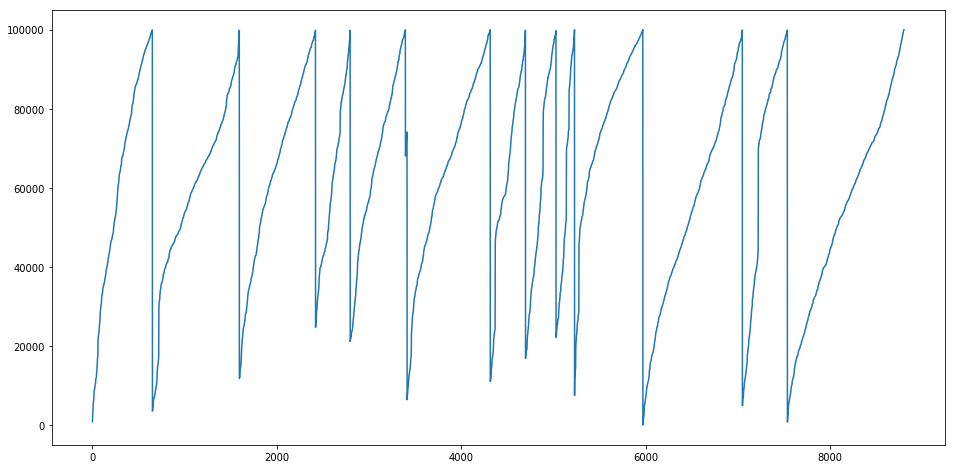

In [50]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.plot(form_fails)

In [51]:
rem_fails.size 

6110

In [52]:
form_fails.size

8803

In [53]:
oob.shape[0]

3425L

In [54]:
total_failures = rem_fails.size  + form_fails.size + oob.shape[0]

In [55]:
print "RM percentage failures of total failures", rem_fails.size * 100. / total_failures

RM percentage failures of total failures 33.3187915803


In [56]:
print "FORM percentage failures of total failures", form_fails.size * 100. / total_failures

FORM percentage failures of total failures 48.0041443996


In [57]:
print "OOB percentage failures of total failures", oob.shape[0] * 100. / total_failures

OOB percentage failures of total failures 18.6770640201


In [58]:
for key in files_based_removals.keys():
    times = np.asarray(files_based_removals[key])
    assert all(np.diff(times) > 0)

In [59]:
for key in files_based_removals.keys():
    times = np.asarray(files_based_formations[key])
    assert all(np.diff(times) > 0)

In [60]:
# check if putting together all times I can reconstruct the entire simulations 
hardcoded_simtime = 100000
all_times = np.arange(hardcoded_simtime)

In [61]:
assert all(all_times - np.sort(sr_attempts) ==0)
assert all(np.diff(np.sort(sr_attempts)) > 0)

In [62]:
total_rewiring_attempts = sr_attempts.size

In [63]:
print "Successful removals of total rewiring attempts", removals.shape[0] * 100. / total_rewiring_attempts

Successful removals of total rewiring attempts 0.149


In [64]:
print "Successful formations of total rewiring attempts", formations.shape[0] * 100. / total_rewiring_attempts

Successful formations of total rewiring attempts 0.112


In [65]:
print "Total percentage of failure to rewire:", total_failures * 100. / total_rewiring_attempts

Total percentage of failure to rewire: 18.338


(array([ 0.42911877,  0.        ,  0.57088123]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

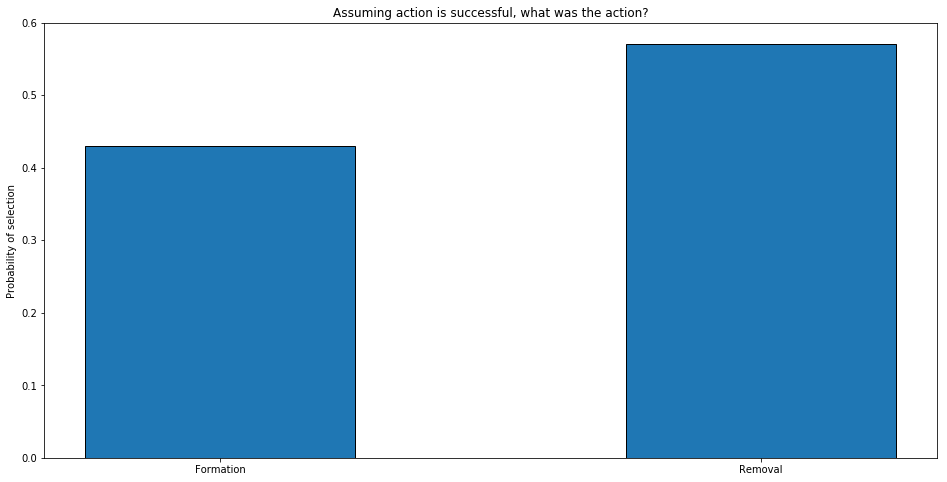

In [66]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
wombo_combo = np.concatenate((np.zeros(formations.shape[0]), np.ones(removals.shape[0])))
ax1.set_title("Assuming action is successful, what was the action?")
plt.xticks([0, 2], ["Formation", "Removal"])
ax1.set_ylabel("Probability of selection")
d = np.unique(wombo_combo*2)
ax1.hist(wombo_combo*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [67]:
# Plot selection counts per connection type

In [68]:
ff_formations = formations[formations[:,2] == 0]
lat_formations = formations[formations[:,2] == 1]

In [69]:
ff_removals = removals[removals[:,2] == 0]
lat_removals = removals[removals[:,2] == 1]

In [70]:
kek = [ff_formations, lat_formations, ff_removals, lat_removals]
silly_list = np.array([])
i=0
for k in kek:
    print k.shape
    silly_list = np.concatenate((silly_list, np.ones(k.shape[0]) * i))
    i += 1

(88L, 4L)
(24L, 4L)
(87L, 4L)
(62L, 4L)


(array([ 0.33716475,  0.09195402,  0.33333333,  0.23754789]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5]),
 <a list of 4 Patch objects>)

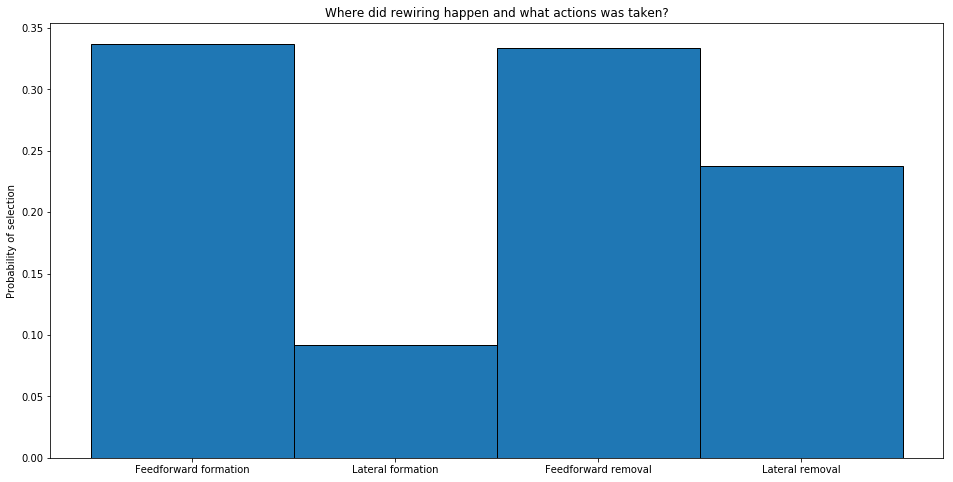

In [71]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Where did rewiring happen and what actions was taken?")
d = np.unique(silly_list)
plt.xticks(np.arange(np.max(d)+2), ["Feedforward formation", "Lateral formation", "Feedforward removal", "Lateral removal"])
ax1.set_ylabel("Probability of selection")
ax1.hist(silly_list, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

(array([ 0.00408759,  0.        ,  0.99591241]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

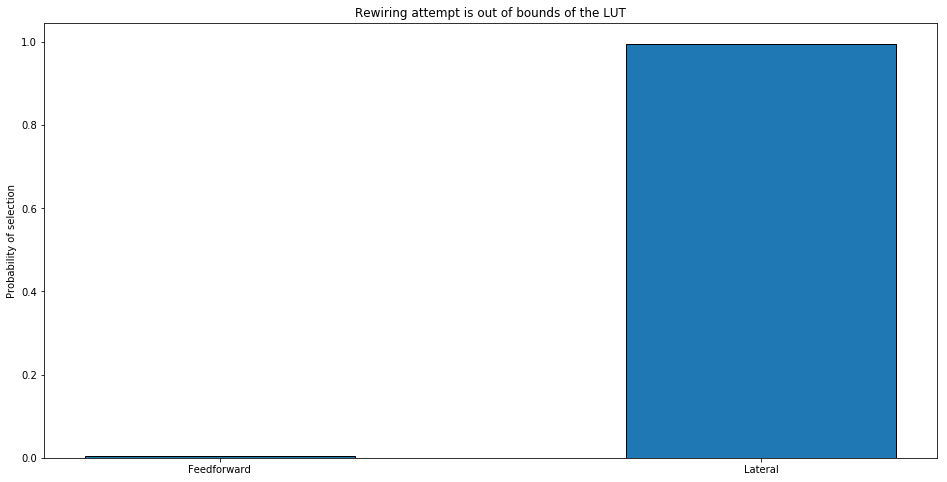

In [72]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8))
ax1.set_title("Rewiring attempt is out of bounds of the LUT")
plt.xticks([0, 2], ["Feedforward", "Lateral"])
ax1.set_ylabel("Probability of selection")
d = np.unique(oob[:, 2]*2)
ax1.hist(oob[:, 2]*2, bins=np.arange(np.max(d)+2)-.5, edgecolor='black', normed=True)

In [73]:
print "out of a total of", oob.shape[0], " occurances of oob, ", np.count_nonzero(oob[:, 2]==1), " have been from lateral connections"
print "that is",  np.count_nonzero(oob[:, 2]==1) * 100. / oob.shape[0], "%"

out of a total of 3425  occurances of oob,  3411  have been from lateral connections
that is 99.5912408759 %
